<a href="https://colab.research.google.com/github/Xuan-He-97/Neural-networks-and-quantum-field-theory/blob/main/Experiments/Chapter4/4_3_Flows_in_Single_layer_networks_ReLU_net_Multi_dimensional_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import pickle
import pathlib
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.special import erf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.integrate import quad, dblquad, tplquad
from tqdm import tqdm

## Introduction

This work depicts the relationship between the coupling strength $\lambda_m$ and the integral bound $\Lambda$. Scaling dimensions of $\lambda_m$ could be obtained from the dimensionlessness of the term $\Delta S = \sum \int d^{d_{i n}} x \mathcal{O}_{k} , $ where operator $\mathcal{O}_{k}:=g_{k} f(x)^{k}$. 

$[\Delta S]=0$ requires $d_{\text {in }}+k[f]+\left[g_{k}\right]=0 . $

For $[f]$, we know that, 

$$
P[f]=e^{-S_{\mathrm{GP}}[f]}=\exp \left[-\frac{1}{2} \int d^{d_{\mathrm{in}}} x d^{d_{\mathrm{im}}} y f(x) \Xi(x, y) f(y)\right]
$$

should have the exponential term dimensionless too. Then, $[S]=2 d_{\text {in }}+2[f]+[\Xi]=0$. 

$\int d^{d_{\text {in }}} x^{\prime} K\left(x, x^{\prime}\right) \Xi\left(x^{\prime}, x^{\prime \prime}\right)=\delta^{\left(d_{\text {in }}\right)}\left(x-x^{\prime \prime}\right) , $ $\Xi$ should satisfy $d_{\text {in }}+[\Xi]+[K]=-d_{\text {in }}$.

Thus the scaling dimension of the correction terms,
$$
\left[g_{k}\right]=-d_{\text {in }}-\frac{k[K]}{2}.
$$

Consider the effective function $S = S_{GP} + \int d^{d_{in}}x \left[ \lambda f(x)^4 + \kappa f(x)^6\right] . $ The couplings of 4-pt and 6-pt correction have input-space dimensions: 

$$
[\lambda] = -d_{in} - 2[K], \quad [\kappa] = -d_{in} - 3[K]
$$

$[\lambda]$ depends on the input dimension. This is analogous to a
well-known effect from QFT, where the dimension of spacetime affects the RG flow.

In previous experiment, we compute the relationship between couplings and boundary terms on one dimensional input. The relationship on 2d and 3d input are to be explored in this notebook.

## RG Equation

The RG equations can be obtained by taking derivatives of above 4 -pt and 6 -pt function with respect to log of the cutoff scale $\Lambda$,
$$
\begin{aligned}
\frac{\partial G^{(4)}\left(x_{1}, x_{2}, x_{3}, x_{4}\right)}{\partial \log \Lambda}=0 &=\frac{\partial \lambda}{\partial \log \Lambda} \int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{4, \lambda}+\lambda \frac{\partial\left(\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{4, \lambda}\right)}{\partial \log \Lambda} \\
+& \frac{\partial \kappa}{\partial \log \Lambda} \int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{4, \kappa}+\kappa \frac{\partial\left(\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{4, \kappa}\right)}{\partial \log \Lambda} \\
\frac{\partial G^{(6)}\left(x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6}\right)}{\partial \log \Lambda}=& 0=\frac{\partial \lambda}{\partial \log \Lambda} \int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{6, \lambda}+\lambda \frac{\partial\left(\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{6, \lambda}\right)}{\partial \log \Lambda} \\
&+\frac{\partial \kappa}{\partial \log \Lambda} \int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{6, \kappa}+\kappa \frac{\partial\left(\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{6, \kappa}\right)}{\partial \log \Lambda}
\end{aligned}
$$
In the limit of large $N$, and potentially of large $\Lambda$, we may ignore $\kappa$ and equations $(124)$ and $(125)$ can be simplified to
$$
\begin{gathered}
\frac{\partial \lambda}{\partial \log \Lambda} \int_{-\Lambda}^{\Lambda} d^{d_{\mathrm{in}}} x\left[\frac{\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{6, \lambda}}{\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }} x \varrho_{6, \kappa}}}-\frac{\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{4, \lambda}}{\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{4, \kappa}}\right]+\lambda\left[\frac{1}{\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{6, \kappa}} \frac{\partial\left(\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{6, \lambda}\right)}{\partial \log \Lambda}\right. \\
\left.-\frac{1}{\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }} x} \varrho_{4, \kappa}} \frac{\partial\left(\int_{-\Lambda}^{\Lambda} d^{d_{\text {in }}} x \varrho_{4, \lambda}\right)}{\partial \log \Lambda}\right]=0
\end{gathered}
$$
Solving the above gives us the $\mathrm{RG}$ equation of $\lambda, \beta(\lambda)$ in our examples.

<br>

We verify above RG equation against the log-log variations of experimental value(s) of $\lambda_{m}$ at different cutoff scales $\Lambda$.

To obtain the rank- 4 tensor $\lambda_{m}$ at different choice of cutoff scales we use 

$\lambda_{m}\left(x_{1}, x_{2}, x_{3}, x_{4}\right):=\frac{K_{12} K_{34}+K_{13} K_{24}+K_{14} K_{23}-G^{(4)}\left(x_{1}, x_{2}, x_{3}, x_{4}\right)}{24 \int d^{d_{\text {in }}} y \Delta_{1234 y}}. $ 

Where $\Delta_{1234 y} = K_{W, 1y}K_{W, 2y}K_{W, 3y}K_{W, 4y}$

All independent tensor elements of $\lambda_{m}$ are plotted below against respective $\Lambda$, in a log-log format, at different values of $d_{\text {in }}$.

## Network Architectures

Define network architectures. 

### Network structure

We test on single layer neural networks. The input dimensions are chosen to be 2 or 3. The output one dimension.

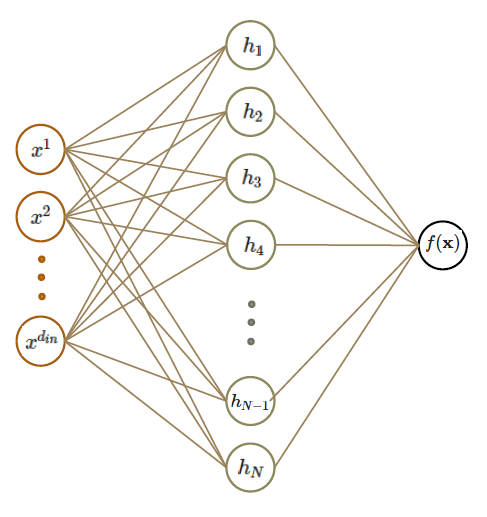

### ReLU-net layer

$$
\sigma(z)=\left\{\begin{array}{ll}
0 & z<0 \\
z & z \geqslant 0
\end{array} .\right.
$$

In [ ]:
def ReLU(inputs, input_dim, units, sigmab2=0.0, sigmaw2=1.0):
    w = np.random.normal(scale=sigmaw2, size=(input_dim, units))
    b = np.random.normal(scale=sigmab2, size=(units,))
    preact = np.matmul(inputs, w) + b
    postact = np.maximum(preact, 0)
    return postact

### ReLU-net kernel

The associated GP kernel is
$$
\begin{aligned}
K_{\mathrm{ReLU}}\left(x, x^{\prime}\right) &=\sigma_{b}^{2}+\sigma_{W}^{2} \frac{1}{2 \pi} \sqrt{\left(\sigma_{b}^{2}+\frac{\sigma_{W}^{2}}{d_{\mathrm{in}}} x \cdot x\right)\left(\sigma_{b}^{2}+\frac{\sigma_{W}^{2}}{d_{\text {in }}} x^{\prime} \cdot x^{\prime}\right)(\sin \theta+(\pi-\theta) \cos \theta)}, \\
\theta &=\arccos \left[\frac{\sigma_{b}^{2}+\frac{\sigma_{w}^{2}}{d_{\mathrm{in}}} x \cdot x^{\prime}}{\sqrt{\left(\sigma_{b}^{2}+\frac{\sigma_{W}^{2}}{d_{\text {in }}} x \cdot x\right)\left(\sigma_{b}^{2}+\frac{\sigma_{\mathrm{w}}^{2}}{d_{\text {in }}} x^{\prime} \cdot x^{\prime}\right)}}\right]
\end{aligned}
$$

Since $\sigma_{b}=0, $ and $ \sigma_{w}=1$, 

$$
K_{\mathrm{ReLU}}\left(x, x^{\prime}\right)=\frac{1}{2d_{\text {in }}}|x|\left|x^{\prime}\right|
$$

The scaling dimension of ReLU kernel is given by $\left[K\left(x, x^{\prime}\right)\right]=2$ and $\left[K_{w}\left(x, x^{\prime}\right)\right]=2$, when $x>\frac{\sigma_{b} \sqrt{d_{\text {in }}}}{\sigma_{W}}$ and $x^{\prime}$ is one of the inputs in our experiments. Given previous analysis, the 4 -pt and 6 -pt couplings scale as $[\lambda]=-d_{\text {in }}-4$ and $[\kappa]=-d_{\text {in }}-6$ respectively. 

The RG equation of the ReLU-net should have the form,
$$
\frac{\partial \lambda}{\partial \log \Lambda} \Lambda^{d_{\text {in }}+4}+\left(d_{\text {in }}+4\right) \lambda \Lambda^{d_{\text {in }}+4}=0
$$
which yields
$$
\beta(\lambda):=\frac{\partial \lambda}{\partial \log (\Lambda)}=-\left(d_{\mathrm{in}}+4\right) \lambda
$$
After integration we get
$$
\log \lambda=-\left(d_{\text {in }}+4\right) \log \Lambda+p_{1}
$$
where $p_{1}$ is the constant of integration.

In [ ]:
def K_ReLU(x, y, sigmab2=0.0, sigmaw2=1.0, d_in=1.0):
    xy = np.dot(x, y)
    xx = np.dot(x, x)
    yy = np.dot(y, y)
    corr = np.sqrt((sigmab2 + sigmaw2*xx/d_in) * (sigmab2 + sigmaw2*yy/d_in))
    costheta = (sigmab2 + sigmaw2*xy/d_in) / corr
    theta = np.arccos(costheta)
    return sigmab2 + sigmaw2 * (1.0 / (2.0*np.pi)) * corr * (np.sin(theta) + (np.pi - theta) * costheta)

### Dense layer

$f_{\theta, N}(x) = z_1^k = \sum_{j=1}^N W_1^{jk}x_1^j + b_1^k$

In [ ]:
def Dense(inputs, input_dim, units, sigmab2=1.0, sigmaw2=1.0):
    w = np.random.normal(scale=np.sqrt(sigmaw2/N), size=(input_dim, units))
    b = np.random.normal(scale=sigmab2, size=(units,))
    return np.matmul(inputs, w) + b

## Compute GP Correlation

### Wick contraction

The rule of Wick contraction is simple: sum over all ways of connecting the points $\{x_1, ..., x_n\}$ in pairs, and in each term draw a line between the points in the pair $(a_i, b_i)$.

$G_{GP}^{(n)}(x_1, ..., x_n) = \sum_{p\in \textrm{Wick}(x_1, ..., x_n)} K(a_1, b_1)...K(a_{n/2}, b_{n/2})$

In [ ]:
def G_gp2(X, K, d_in=1.0):
    x1, x2 = X
    return K(x1, x2, d_in=d_in)

In [ ]:
def G_gp4(X, K, d_in=1.0):
    x1, x2, x3, x4 = X
    return K(x1, x2, d_in=d_in) * K(x3, x4, d_in=d_in) + K(x1, x3, d_in=d_in) * K(x2, x4, d_in=d_in) + K(x1, x4, d_in=d_in) * K(x2, x3, d_in=d_in)

In [ ]:
def G_gp6(X, K, d_in=1.0):
    wick_pairs = [[1, 2, 3, 4, 5, 6], [1, 2, 3, 5, 4, 6], [1, 2, 3, 6, 4, 5], [1, 3, 2, 4, 5, 6], [1, 3, 2, 5, 4, 6],
                  [1, 3, 2, 6, 4, 5], [1, 4, 2, 3, 5, 6], [1, 4, 2, 5, 3, 6], [1, 4, 2, 6, 3, 5], 
                  [1, 5, 2, 3, 4, 6], [1, 5, 2, 4, 3, 6],
                  [1, 5, 2, 6, 3, 4], [1, 6, 2, 3, 4, 5], [1, 6, 2, 4, 3, 5], [1, 6, 2, 5, 3, 4]]
    res = 0
    for x1, x2, x3, x4, x5, x6 in wick_pairs:
        res += K(X[x1-1], X[x2-1], d_in=d_in) * K(X[x3-1], X[x4-1], d_in=d_in) * K(X[x5-1], X[x6-1], d_in=d_in)
    return res

## Input of the network

Inputs of ReLU-net are all positive so that the kernel is always nonzero.

In [ ]:
X_ReLU_2d = np.array([[0.5, 0.5], [0.5, 1.0], [1.0, 0.5], [1.0, 1.0]])
X_ReLU_3d = np.array([[0.2, 0.2, 0.2], [1.0, 1.0, 0.2], [0.2, 1.0, 1.0], [1.0, 0.2, 1.0]])

## Mount to google drive

Variables will be saved to google drive.

In [ ]:
from google.colab import drive
# log in to the google drive account
drive.mount('/gdrive')

Mounted at /gdrive


## Find all distinct combination of $G^{(n)}$

Permutations in correlation function $G^{(n)}$ yield same results. Thus we only consider those combinations of distinct $G^{(n)}$ values.

In [ ]:
def findsubsets(X, n):
    res = []
    for i1 in range(n+1):
        for i2 in range(n+1-i1):
            for i3 in range(n+1-i1-i2):
                i4 = n-i1-i2-i3
                res.append([X[0]]*i1 + [X[1]]*i2 + [X[2]]*i3 + [X[3]]*i4)
    return res

## n-pt function

Function to compute n-pt function of experimental results.

$$G^{(n)}(x_1, ..., x_n) = \mathcal{E}[f_{\alpha}(x_1)...f_{\alpha}(x_n)]$$

Here we have discrete weights:

$$G^{(n)}\left(x_{1}, \ldots, x_{n}\right)=\frac{1}{n_{\text {nets }}} \sum_{\alpha \in \text { nets }}^{n_{\text {nets }}} f_{\alpha}\left(x_{1}\right), \ldots, f_{\alpha}\left(x_{n}\right)$$

In [ ]:
def npt(Y, comb):
    corr_function = []
    for c in comb:
        corr_function.append(Y[:, :, c].prod(2).mean(1))
    
    return np.array(corr_function).T # shape = len(comb)

## ReLU-net 2D

### Find all disinct combination of $x_i$

In [ ]:
comb2 = findsubsets(range(len(X_ReLU_2d)), 2)
print(len(comb2))
comb4 = findsubsets(range(len(X_ReLU_2d)), 4)
print(len(comb4))
comb6 = findsubsets(range(len(X_ReLU_2d)), 6)
print(len(comb6))

10
35
84


### Calculate gaussian process 2, 4, 6-pt functions

In [ ]:
G_gp2_ReLU = []
for c in comb2:
    G_gp2_ReLU.append(G_gp2(X_ReLU_2d[c], K_ReLU, d_in=2.0))

G_gp2_ReLU = dict(zip([tuple(c) for c in comb2], G_gp2_ReLU))

In [ ]:
G_gp4_ReLU = []
for c in comb4:
    G_gp4_ReLU.append(G_gp4(X_ReLU_2d[c], K_ReLU, d_in=2.0))

G_gp4_ReLU = dict(zip([tuple(c) for c in comb4], G_gp4_ReLU))

In [ ]:
G_gp6_ReLU = []
for c in comb6:
    G_gp6_ReLU.append(G_gp6(X_ReLU_2d[c], K_ReLU, d_in=2.0))

G_gp6_ReLU = dict(zip([tuple(c) for c in comb6], G_gp6_ReLU))

### Calculate the network output

In [ ]:
%%time
fx_exps = []

N = 20

print('Proceeding N =', N, '...')
fx_exp = []
for j in range(100):
    Y = []
    for i in range(100000):
        m = ReLU(X_ReLU_2d, 2, N)
        y = Dense(m, N, 1, sigmab2=0.0)
        Y.append(y)
    Y = np.array(Y).reshape(100000, 4)
    fx_exp.append(Y)

fx_exp = np.array(fx_exp)
with open('/gdrive/MyDrive/RG/ReLU/fx_exp_2d.pickle', 'wb') as handle:
    pickle.dump(fx_exp, handle)
fx_exps.append(fx_exp)

Proceeding N = 20 ...
CPU times: user 5min 16s, sys: 4.59 s, total: 5min 20s
Wall time: 5min 18s


### $\Delta_{1234y}$

In [ ]:
def integrand4(t1, t2, x1, x2, x3, x4, K, d_in=1.0):
    t = np.array([t1, t2])
    return np.maximum(K(x1, t, d_in=d_in) * K(x2, t, d_in=d_in) * K(x3, t, d_in=d_in) * K(x4, t, d_in=d_in), 1e-11)

### $\int d^{d_{in}}y \; \Delta_{1234y}$

In [ ]:
def compute_integral4(X, comb, K, Lambda, integrand=integrand4, d_in=1.0):
    res = []
    for c in comb:
        x1, x2, x3, x4 = X[c]
        res.append(dblquad(integrand, -Lambda, Lambda, -Lambda, Lambda, args=(x1, x2, x3, x4, K, d_in))[0])
    return dict(zip([tuple(c) for c in comb], res))

### Load experimental $G^{(4)}$ result and compute $\lambda_m$

In [ ]:
lambdam4_ReLU = []
G4_ReLU = []
file = pathlib.Path('/gdrive/MyDrive/RG/ReLU/fx_exp_2d.pickle')
Lambda_list = [7, 10, 15, 20, 30, 40, 50, 70, 100, 200, 500, 1000, 2000, 5000, 7000, 10000, 20000, 40000, 60000, 80000, 100000]

with open(file, 'rb') as handle:
    fx_exp = pickle.load(handle).reshape(10000000, 4)

for c in comb4: 
    G4 = fx_exp[:, c].prod(1).mean()
    G4_ReLU.append(G4)

In [ ]:
def Kw_ReLU(x, y, sigmab2=0.0, sigmaw2=1.0, d_in=1.0):
    xy = np.dot(x, y)
    xx = np.dot(x, x)
    yy = np.dot(y, y)
    corr = np.sqrt((sigmab2 + 1e-11 + sigmaw2*xx/d_in) * (sigmab2 + 1e-11 + sigmaw2*yy/d_in))

    costheta = (sigmab2 + sigmaw2*xy/d_in) / corr
    theta = np.arccos(costheta)
    return sigmaw2 * (1.0 / (2.0*np.pi)) * corr * (np.sin(theta) + (np.pi - theta) * costheta)

In [ ]:
for Lambda in tqdm(Lambda_list):
    
    integral4_ReLU = compute_integral4(X_ReLU_2d, comb4, Kw_ReLU, Lambda, d_in=2.0)
    for i, c in enumerate(comb4): 
        A = G_gp4_ReLU[tuple(c)]
        B = 24 * integral4_ReLU[tuple(c)]
        G4 = G4_ReLU[i]
        lambdam4_ReLU.append((A - G4) / B)


100%|██████████| 21/21 [03:10<00:00,  9.08s/it]


### Plot Coupling Strength

In [ ]:
lambdam4_ReLU_df = pd.DataFrame(np.log10(np.abs(lambdam4_ReLU).reshape(21, -1)))
lambdam4_ReLU_df.index = np.log10(Lambda_list)

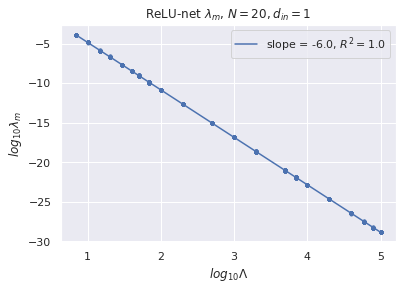

In [ ]:
# Fit the line
x = np.log10(Lambda_list)
y = lambdam4_ReLU_df.mean(1)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
xp = x
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax = lambdam4_ReLU_df.plot(legend=False, style='.', c='b')
line = ax.plot(xp, p(xp), label='slope = ' + str(round(z[0], 3)) + ', $R^2 = $' + str(round(r_value**2, 3)), c='b')
lines, labels = ax.get_legend_handles_labels()
ax.legend([lines[-1]], [labels[-1]], loc='best')
plt.xlabel("$log_{10}\Lambda$")
plt.ylabel("$log_{10}\lambda_m$")
plt.title("ReLU-net $\lambda_m$, $N = 20, d_{in} = 2$")
plt.show()

## ReLU-net 3D Input

### Find all disinct combination of $x_i$

In [ ]:
comb2 = findsubsets(range(len(X_ReLU_3d)), 2)
print(len(comb2))
comb4 = findsubsets(range(len(X_ReLU_3d)), 4)
print(len(comb4))
comb6 = findsubsets(range(len(X_ReLU_3d)), 6)
print(len(comb6))

10
35
84


### Calculate gaussian process 2, 4, 6-pt functions

In [ ]:
G_gp2_ReLU = []
for c in comb2:
    G_gp2_ReLU.append(G_gp2(X_ReLU_3d[c], K_ReLU, d_in=3.0))

G_gp2_ReLU = dict(zip([tuple(c) for c in comb2], G_gp2_ReLU))

In [ ]:
G_gp4_ReLU = []
for c in comb4:
    G_gp4_ReLU.append(G_gp4(X_ReLU_3d[c], K_ReLU, d_in=3.0))

G_gp4_ReLU = dict(zip([tuple(c) for c in comb4], G_gp4_ReLU))

In [ ]:
G_gp6_ReLU = []
for c in comb6:
    G_gp6_ReLU.append(G_gp6(X_ReLU_3d[c], K_ReLU, d_in=3.0))

G_gp6_ReLU = dict(zip([tuple(c) for c in comb6], G_gp6_ReLU))

### Calculate the network output

In [ ]:
%%time
fx_exps = []

N = 20

print('Proceeding N =', N, '...')
fx_exp = []
for j in range(100):
    Y = []
    for i in range(100000):
        m = ReLU(X_ReLU_3d, 3, N)
        y = Dense(m, N, 1, sigmab2=0.0)
        Y.append(y)
    Y = np.array(Y).reshape(100000, 4)
    fx_exp.append(Y)

fx_exp = np.array(fx_exp)
with open('/gdrive/MyDrive/RG/ReLU/fx_exp_3d.pickle', 'wb') as handle:
    pickle.dump(fx_exp, handle)
fx_exps.append(fx_exp)

Proceeding N = 20 ...
CPU times: user 6min 22s, sys: 2.24 s, total: 6min 24s
Wall time: 6min 27s


### $\Delta_{1234y}$

In [ ]:
def integrand4(t1, t2, t3, x1, x2, x3, x4, K, d_in=1.0):
    t = np.array([t1, t2, t3])
    return np.maximum(K(x1, t, d_in=d_in) * K(x2, t, d_in=d_in) * K(x3, t, d_in=d_in) * K(x4, t, d_in=d_in), 1e-11)

### $\int d^{d_{in}}y \; \Delta_{1234y}$

In [ ]:
def compute_integral4(X, comb, K, Lambda, integrand=integrand4, d_in=1.0):
    res = []
    for c in comb:
        x1, x2, x3, x4 = X[c]
        res.append(tplquad(integrand, -Lambda, Lambda, -Lambda, Lambda, -Lambda, Lambda, args=(x1, x2, x3, x4, K, d_in))[0])
    return dict(zip([tuple(c) for c in comb], res))

### Load experimental $G^{(4)}$ and $G^{(6)}$ result and compute $\lambda_m$

In [ ]:
lambdam4_ReLU = []
G4_ReLU = []
file = pathlib.Path('/gdrive/MyDrive/RG/ReLU/fx_exp_3d.pickle')
Lambda_list = [7, 10, 15, 20, 30, 40, 50, 70, 100, 200, 500, 1000, 2000, 5000, 7000, 10000, 20000, 40000, 60000, 80000, 100000]

with open(file, 'rb') as handle:
    fx_exp = pickle.load(handle).reshape(10000000, 4)

for c in comb4: 
    G4 = fx_exp[:, c].prod(1).mean()
    G4_ReLU.append(G4)

In [ ]:
for Lambda in tqdm(Lambda_list):
    
    integral4_ReLU = compute_integral4(X_ReLU_3d, comb4, Kw_ReLU, Lambda, d_in=3.0)

    for i, c in enumerate(comb4): 
        A = G_gp4_ReLU[tuple(c)]
        B = 24 * integral4_ReLU[tuple(c)]
        G4 = G4_ReLU[i]
        lambdam4_ReLU.append((A - G4) / B)


100%|██████████| 21/21 [1:39:56<00:00, 285.54s/it]


### Plot Coupling Strength

In [ ]:
lambdam4_ReLU_df = pd.DataFrame(np.log10(np.abs(lambdam4_ReLU).reshape(21, -1)))
lambdam4_ReLU_df.index = np.log10(Lambda_list)

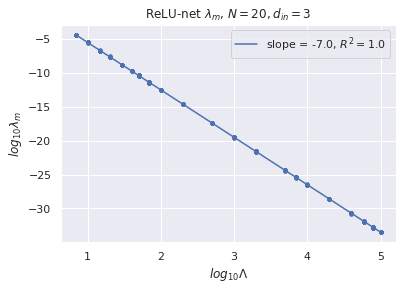

In [ ]:
# Fit the line
x = np.log10(Lambda_list)
y = lambdam4_ReLU_df.mean(1)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
xp = x
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
ax = lambdam4_ReLU_df.plot(legend=False, style='.', c='b')
line = ax.plot(xp, p(xp), label='slope = ' + str(round(z[0], 3)) + ', $R^2 = $' + str(round(r_value**2, 3)), c='b')
lines, labels = ax.get_legend_handles_labels()
ax.legend([lines[-1]], [labels[-1]], loc='best')
plt.xlabel("$log_{10}\Lambda$")
plt.ylabel("$log_{10}\lambda_m$")
plt.title("ReLU-net $\lambda_m$, $N = 20, d_{in} = 3$")
plt.show()